<h1>Содержание<span class="tocSkip"></span></h1>
<li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Импорт-и-загрузка-необходимых-библиотек." data-toc-modified-id="Импорт-и-загрузка-необходимых-библиотек.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт и загрузка необходимых библиотек.</a></span></li><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Знакомство с данными</a></span></li><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Подготовка признаков</a></span></li><li><span><a href="#Разделение-фрейма-на-выборки.-Балансировка-классов" data-toc-modified-id="Разделение-фрейма-на-выборки.-Балансировка-классов-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Разделение фрейма на выборки. Балансировка классов</a></span></li><li><span><a href="#Подготовка-и-применение-конвертера-данных-в-TF-IDF-матрицу-векторов" data-toc-modified-id="Подготовка-и-применение-конвертера-данных-в-TF-IDF-матрицу-векторов-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Подготовка и применение конвертера данных в TF-IDF матрицу векторов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Model-LogisticRegression" data-toc-modified-id="Model-LogisticRegression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><strong>Model LogisticRegression</strong></a></span></li><li><span><a href="#Model-SGDClassifier" data-toc-modified-id="Model-SGDClassifier-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span><strong>Model SGDClassifier</strong></a></span></li><li><span><a href="#Model-LinearSVC" data-toc-modified-id="Model-LinearSVC-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span><strong>Model LinearSVC</strong></a></span></li><li><span><a href="#Model-AdaBoostClassifier" data-toc-modified-id="Model-AdaBoostClassifier-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span><strong>Model AdaBoostClassifier</strong></a></span></li><li><span><a href="#Поиск-гиперпараметров-для-лучшей-модели-(LinearSVC)" data-toc-modified-id="Поиск-гиперпараметров-для-лучшей-модели-(LinearSVC)-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span><strong>Поиск гиперпараметров для лучшей модели (LinearSVC)</strong></a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию.

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75.

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели.
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

### Импорт и загрузка необходимых библиотек.

In [ ]:
# установим необходимые библиотеки.
!pip install -U imbalanced-learn
!pip install -U pandarallel
!pip install -U gdown
!pip install -U spacy

!python -m spacy download en_core_web_md


# Импортируем основные библиотеки для работы с данными.
import pandas as pd
import numpy as np

# Настройка, чтобы текст в ячейке отображался весь.
pd.set_option('display.max_colwidth', None)
# Настроим 2 знака после точки в float и разделение запятой тысячные до запятой.
pd.set_option('display.float_format', '{:,.2f}'.format)
# Уберем сообщения об ошибке -цепного присваивания.
pd.options.mode.chained_assignment = None


# Выгрузим модели для обучения.
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier


# для создания конструктора модели.
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.preprocessing import Normalizer
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer


# импортируем библиотеки для кодирования и подготовки данных, а так же поиска лучших гиперпараметров.
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV, StratifiedKFold
from sklearn import metrics
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE

# Библиотеки для разделения текста на токены и последующей лемматизации.
import spacy
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords as nltk_stopwords



# Для распараллеливания процесса лемматизации целевого признака.
from pandarallel import pandarallel
from tqdm.notebook import tqdm
tqdm.pandas(desc='progress')
pandarallel. initialize (progress_bar=True)


# Для построения графиков
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
plt. style. use('dark_background')


#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 15, 9
rcParams["figure.autolayout"] = True
rcParams['axes.labelsize'] = 20
rcParams['axes.titlesize'] = 20
# Для вывода результатов.
from pprint import pprint
from IPython.display import display

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 2.3 MB/s eta 0:00:00
  Created wheel for pandarallel: filename=pandarallel-1.6.5-py3-none-any.whl size=16677 sha256=f5f78f2f409b15094e8fcebecffc37ca916a9132ee4a2100cea681672fa339b9
  Stored in directory: /root/.cache/pip/wheels/50/4f/1e/34e057bb868842209f1623f195b74fd7eda229308a7352d47f
Successfully built pandarallel
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 18.4 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.5.4
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Знакомство с данными

In [ ]:
# Прочитаем файл данных.
file_list=['datasets/toxic_comments.csv']


try:
  dataframe = pd.read_csv(file_list[0],usecols=['text', 'toxic'])
except:
  dataframe = pd.read_csv('https://code.s3.yandex.net/'+file_list[0],usecols=['text', 'toxic'])

df=dataframe.copy(deep=True)

In [ ]:
# Посмотрим общую информацию о датафрейме.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


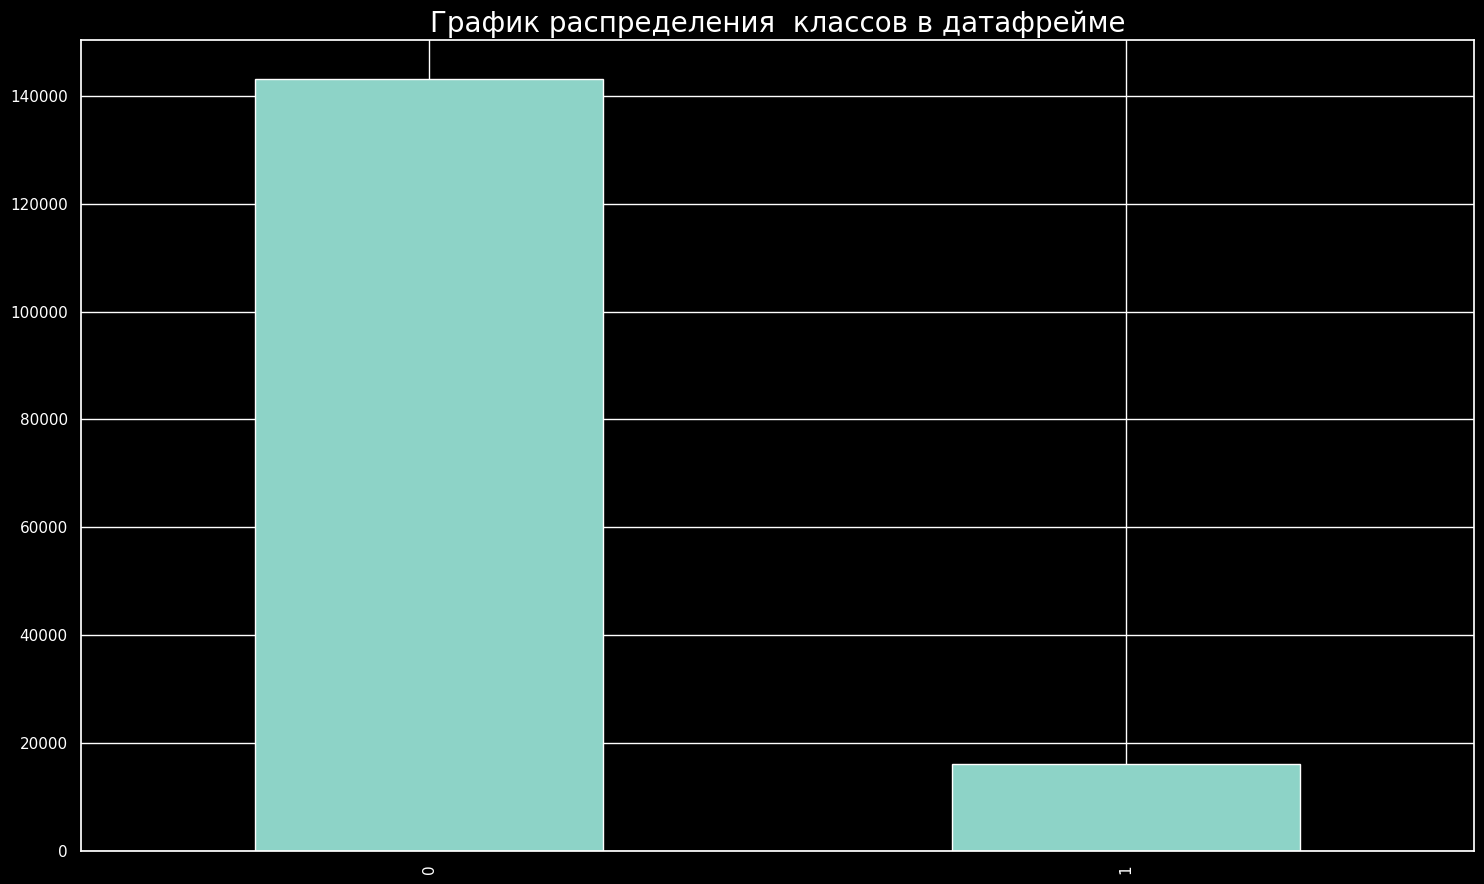

In [ ]:
# Посмотрим на распределение классов в серии 'toxic'.


plt.figure()
df.toxic.value_counts().plot(kind="bar").set(title='График распределения  классов в датафрейме');

In [ ]:
# Проверим датафрейм на отсутствие дубликатов в признаке.

df. text. duplicated(). sum()

0

### Подготовка признаков

In [ ]:
# Загрузим необходимую библиотеку для работы с текстом.

nlp = spacy.load('en_core_web_md',disable=['parser', 'ner'])

In [ ]:
# Создадим функцию для разделения текста (удаление пунктуации,лишних слов и цифр) на токены и проведения лемматизации.

def lemma_construct(text:str):
  '''Функция принимает строку на английском языке. Весь текст переводится в нижний регистр.
  Полученные токены проходят лемматизацию.Удаляются знаки пунктуации,цифры и слова из
  стоп-списка, путём замены их на пропуски. Выходные данные: строка с леммами.
  '''
  text=text.lower()
  my_doc = nlp(text)
  my_doc= [token for token in my_doc if not token.is_stop and not token.is_punct]
  my_doc= " ".join([token.lemma_ for token in my_doc])
  my_doc=re.sub(r'[^a-zA-Z]',' ',my_doc)
  return ' '.join(my_doc.split())

In [ ]:
# Проверим работу функции.

lemm_try=lemma_construct (df.text[0])
lemm_try

'explanation edit username hardcore metallica fan revert vandalism closure gas vote new york dolls fac remove template talk page retire now'

In [ ]:
# Применим функцию к признаку 'text' с применением распараллеливания процесса лемматизации.
# Обработка занимает 15 минут. Готовый датафрейм подгружается с google disk.

#df['lemmatized']=df.text.parallel_apply(lemma_construct)

In [ ]:
# Загрузим итоговый датафрейм.

!gdown --id 12EvhJFRMc4dPxq8nPG6nPtY6QGoWGLGu

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=12EvhJFRMc4dPxq8nPG6nPtY6QGoWGLGu
To: /content/toxic_lemma_text2.csv.xz
100% 25.6M/25.6M [00:00<00:00, 31.1MB/s]


In [ ]:
# Сохраним данные из файла и посмотрим общую информацию.

df_new=pd.read_csv('toxic_lemma_text2.csv.xz',usecols=['text', 'toxic', 'lemmatized'])
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   text        159292 non-null  object
 1   toxic       159292 non-null  int64 
 2   lemmatized  159164 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.6+ MB


In [ ]:
# Проверим полученную серию на пропуски.

df_new.lemmatized.isna(). sum()

128

In [ ]:
# Удалим пропуски.

df_new.dropna(inplace=True)

In [ ]:
# Ещё посмотрим общую информацию.

df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159164 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   text        159164 non-null  object
 1   toxic       159164 non-null  int64 
 2   lemmatized  159164 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.9+ MB


In [ ]:
# Посмотрим на получившийся текст.

df_new.head(2)

,text,toxic,lemmatized
0,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,explanation edit username hardcore metallica fan revert vandalism closure gas vote new york dolls fac remove template talk page retire now
1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,d aww match background colour seemingly stick thank talk january utc


### Разделение фрейма на выборки. Балансировка классов

In [ ]:
# Создадим копию датафрейма. Удалим первоначальный текст.


datafr=df_new.copy(deep=True)
df_new=df_new.drop('text', axis=True)
feature=df_new.drop('toxic', axis=True)
tagret=df_new['toxic']

In [ ]:
# Разделим датафрейм на выборки.

train, test = train_test_split(df_new, shuffle=True, test_size=0.33,random_state=12345)

f_train=train.drop('toxic', axis=1)
t_train=train ['toxic']
f_test=test.drop('toxic', axis=1)
t_test=test['toxic']

for n in [f_test,t_test,f_train, t_train]:
   print (n.shape)

(52525, 1)
(52525,)
(106639, 1)
(106639,)


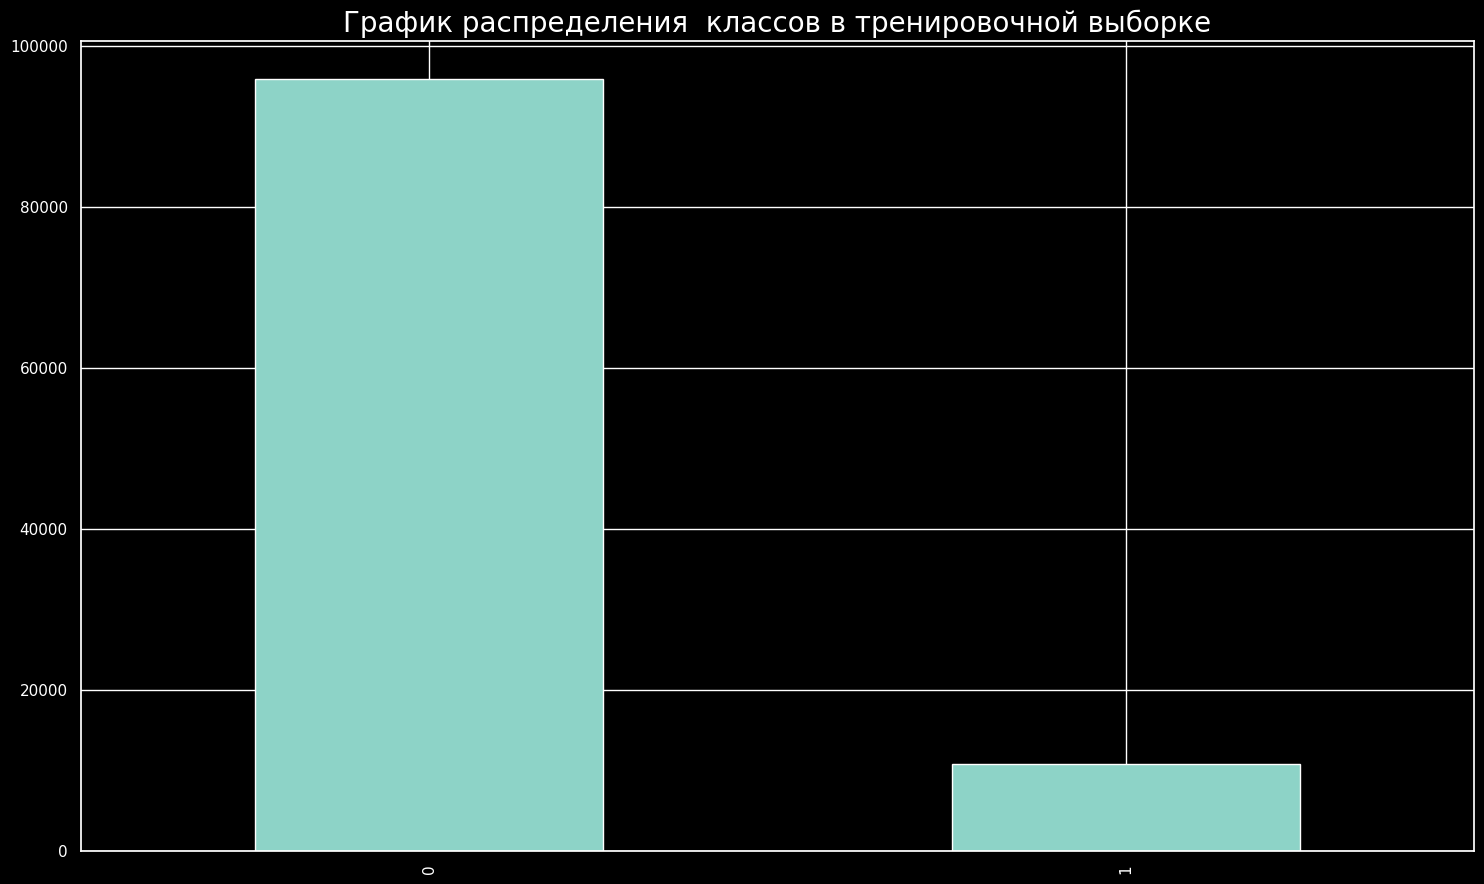

In [ ]:
# Посмотрим на распределение классов в тренировочной выборке.


plt.figure()
t_train.value_counts().plot(kind="bar").set(title='График распределения  классов в тренировочной выборке');

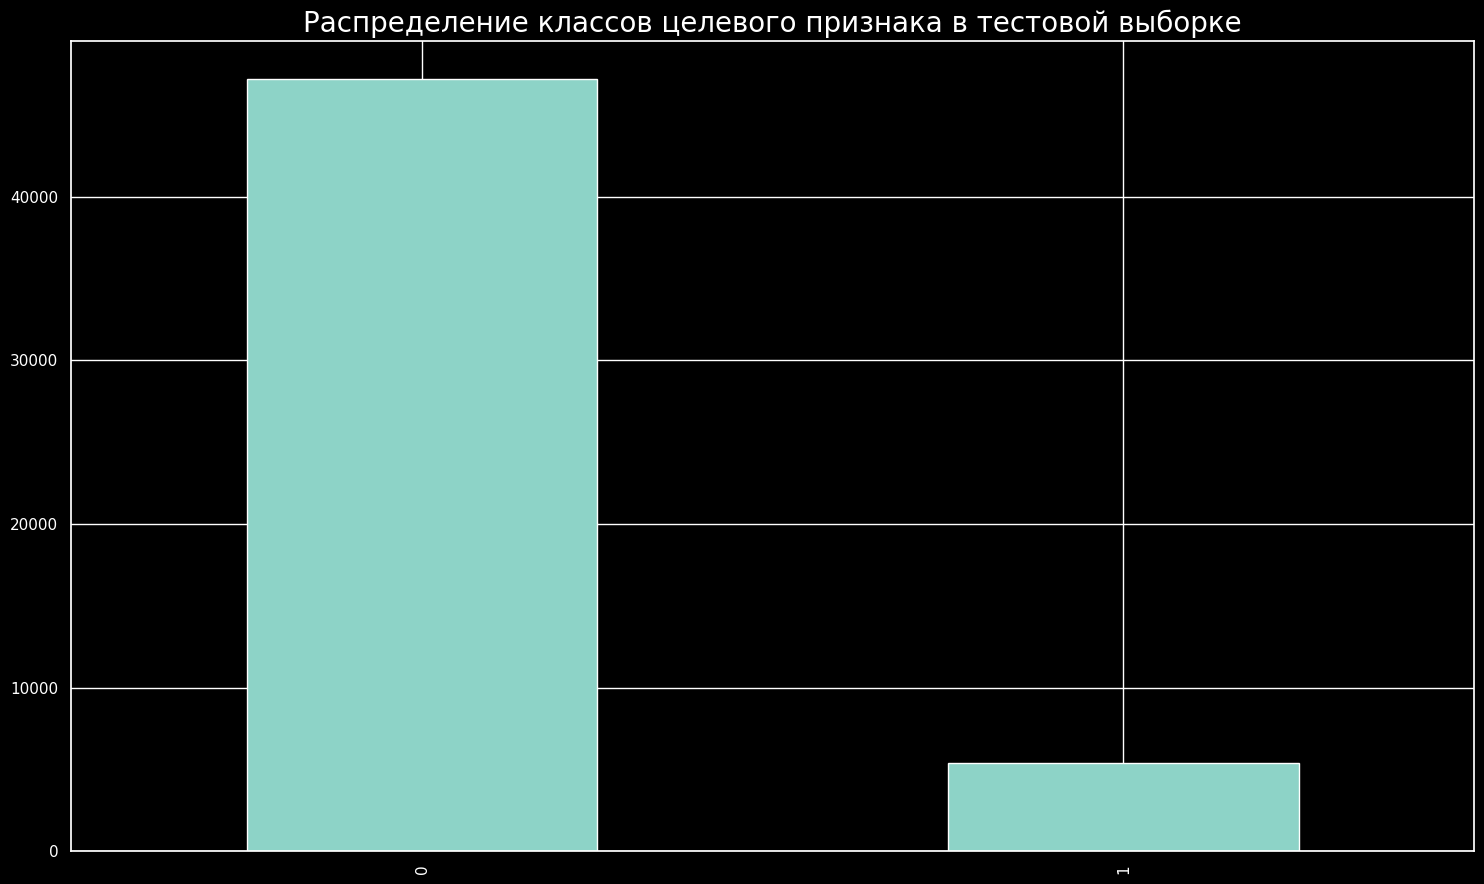

In [ ]:
# Посмотрим на распределение классов в тестовой выборке.
plt.figure()
t_test.value_counts().plot(kind="bar").set(title='Распределение классов целевого признака в тестовой выборке') ;

### Подготовка и применение конвертера данных в TF-IDF матрицу векторов

In [ ]:
# загружаю стоп слова

stopwords = list(set(nltk_stopwords.words('english')))

In [ ]:
# Создадим объект трансформера.

tf_count= TfidfVectorizer(sublinear_tf=True, max_df=0.5, min_df=5,stop_words=stopwords)

In [ ]:
# Обучим и трансформируем тренировочную выборку.

tf_count.fit(f_train['lemmatized'])
tf_f_train=tf_count.transform(f_train['lemmatized'])

In [ ]:
# Трансформируем в векторы тестовую выборку.

tf_f_test=tf_count.transform (f_test['lemmatized'])

In [ ]:
# Посмотрим на итоговые размеры тренировочных выборок.

tf_f_train.shape, t_train.shape

((106639, 22371), (106639,))

In [ ]:
# Посмотрим на список симметрической разницы между списками стоп-слов из библиотек spacy и not.
# Посмотрим 10 слов для понимания.

different=set(stopwords)^nlp.Defaults.stop_words
display (list(different) [:10])
print ('Количество слов симметрической разности множеств стоп-слов:', len(different))

['anywhere',
 'haven',
 'also',
 'serious',
 'however',
 'thereafter',
 "shan't",
 'show',
 'll',
 'couldn']

Количество слов симметрической разности множеств стоп-слов: 259


### Вывод

На данном этапе были загружены данные состоящие из 1 текстового признака и целевого признака. Итого 2 колонки и 159292 строк. В ходе рассмотрения данных была обнаружена несбалансированность классов целевого признака. Для обработки текстового признака (токены,леммы)была использована библиотека spacy, а для распараллеливания процесса библиотека pandarallel. Был применен TfidfVectorizer для конвертацииданных в TF-IDF матрицу векторов. При обработке текстового признака были исключены стоп-слова из библиотек space и nltk.

## Обучение

In [ ]:
# создадим класс для подбора параметров.

skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=12345)
skf_cvs = StratifiedKFold(n_splits=5,shuffle=False)

class ModelEvaluate:
  def __init__(self,model):
    self. model = model
  def evaluate(self,param,cv=skf,n_iter=4,features=f_train, target=t_train):
    self. rand_search = RandomizedSearchCV(estimator = self. model, param_distributions = param,cv =  cv, n_iter=n_iter,n_jobs = -1,random_state=12345,verbose = 1,scoring='f1')
    return self
  def fit(self,features=tf_f_train, target=t_train):
    self.fitted= self.rand_search.fit(features, target)
    return self

In [ ]:
# Создадим фрейм для сбора информации и функцию,чтобы делать это автоматически.

finality =pd.DataFrame(columns=['model','f1'])


In [ ]:
# Создалим функция для проведения кросвалидации.

def cvs_score(model,features=tf_f_train, target=t_train):
  score=round(cross_val_score(model,tf_f_train,t_train,cv=skf_cvs,scoring='f1').mean(), 2)
  return score

In [ ]:
# Создадим объект класса SMOTE  для дальнейшего устранения дисбаланса классов.
sm = SMOTE(random_state=12345, k_neighbors=5)

### **Model LogisticRegression**

*Метод кроссвалидации*

In [ ]:
# Создадим конструкторы для проведения кросвалидации.

pipe_log_reg= imbpipeline(steps=[
    ['scaler', Normalizer()],
    ['smote', sm],
    ['model', LogisticRegression(max_iter=1000,n_jobs=-1,random_state=12345)]])

pipe_log_reg_no_smote= Pipeline(steps=[
    ['scaler', Normalizer()],
    ['model', LogisticRegression(max_iter=1000,n_jobs=-1,random_state=12345)]])

list_pipe_log=[pipe_log_reg, pipe_log_reg_no_smote]
g=[]
for pipe in list_pipe_log:
  g. append (cvs_score(pipe))

In [ ]:
finality.loc[0]=['LogisticRegression with Smote on train',g[0]]
finality.loc[1]=['LogisticRegression on train', g[1]]
finality

,model,f1
0,LogisticRegression with Smote on train,0.65
1,LogisticRegression on train,0.73


### **Model SGDClassifier**

*Метод кроссвалидации*

In [ ]:
pipe_sgd= imbpipeline(steps=[
              ['scaler', Normalizer()],
              ['smote', sm],
              ['model', SGDClassifier(random_state=12345,n_jobs=-1)]])

pipe_sgd_no_smote= Pipeline(steps=[
              ['scaler', Normalizer()],
              ['model', SGDClassifier(random_state=12345,n_jobs=-1)]])

list_pipe_sgd=[pipe_sgd, pipe_sgd_no_smote]
for pipe in list_pipe_sgd:
  g. append (cvs_score(pipe))

In [ ]:
finality.loc[2]=['SGDClassifier with Smote on train',g[2]]
finality.loc[3]=['SGDClassifier on train', g[3]]
finality

,model,f1
0,LogisticRegression with Smote on train,0.65
1,LogisticRegression on train,0.73
2,SGDClassifier with Smote on train,0.56
3,SGDClassifier on train,0.66


### **Model LinearSVC**

*Метод кроссвалидации*

In [ ]:
pipe_svc= imbpipeline(steps=[
          ['scaler', Normalizer()],
          ['smote', sm],
          ['svc_lin', LinearSVC(random_state=12345)]])

pipe_svc_no_smote= Pipeline(steps=[
          ['scaler', Normalizer()],
          ['svc_lin', LinearSVC(random_state=12345)]])

list_pipe_svc=[pipe_svc, pipe_svc_no_smote]
for pipe in list_pipe_svc:
  g. append (cvs_score(pipe))

In [ ]:
finality.loc[4]=['LinearSVC with Smote on train',g[4]]
finality.loc[5]=['LinearSVC on train', g[5]]
finality

,model,f1
0,LogisticRegression with Smote on train,0.65
1,LogisticRegression on train,0.73
2,SGDClassifier with Smote on train,0.56
3,SGDClassifier on train,0.66
4,LinearSVC with Smote on train,0.65
5,LinearSVC on train,0.78


### **Model AdaBoostClassifier**

Метод кроссвалидации

In [ ]:
pipe_ada=imbpipeline(steps=[
                ['scaler', Normalizer()],
                ['smote', sm],
                ['ada_clf', AdaBoostClassifier(random_state=12345)]])

pipe_ada_no_smote=Pipeline(steps=[
                ['scaler', Normalizer()],
                ['ada_clf', AdaBoostClassifier(random_state=12345)]])

list_pipe_ada=[pipe_ada, pipe_ada_no_smote]
for pipe in list_pipe_ada:
  g. append (cvs_score(pipe))

In [ ]:
finality.loc[6]=['AdaBoostClassifier with Smote on train',g[6]]
finality.loc[7]=['AdaBoostClassifier on train', g[7]]
finality

,model,f1
0,LogisticRegression with Smote on train,0.65
1,LogisticRegression on train,0.73
2,SGDClassifier with Smote on train,0.56
3,SGDClassifier on train,0.66
4,LinearSVC with Smote on train,0.65
5,LinearSVC on train,0.78
6,AdaBoostClassifier with Smote on train,0.39
7,AdaBoostClassifier on train,0.69


### **Поиск гиперпараметров для лучшей модели (LinearSVC)**

In [ ]:
param_svc={'svc_lin__max_iter':range(500,1100,100)}

model_svc=ModelEvaluate(pipe_svc_no_smote)
model_svc.evaluate(param_svc)
svc=model_svc.fit()
svc.fitted

Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=12345, shuffle=True),
                   estimator=Pipeline(steps=[['scaler', Normalizer()],
                                             ['svc_lin',
                                              LinearSVC(random_state=12345)]]),
                   n_iter=4, n_jobs=-1,
                   param_distributions={'svc_lin__max_iter': range(500, 1100, 100)},
                   random_state=12345, scoring='f1', verbose=1)

In [ ]:
finality.loc[8]=['LinearSVC tuned on train', svc.fitted.best_score_]
finality

,model,f1
0,LogisticRegression with Smote on train,0.65
1,LogisticRegression on train,0.73
2,SGDClassifier with Smote on train,0.56
3,SGDClassifier on train,0.66
4,LinearSVC with Smote on train,0.65
5,LinearSVC on train,0.78
6,AdaBoostClassifier with Smote on train,0.39
7,AdaBoostClassifier on train,0.69
8,LinearSVC tuned on train,0.78


### Вывод

После подготовки признаков и разбиения данных на признаки были обучены 4 модели машинного обучения с использованием метода увеличения числа примеров миноритарного класса (SMOTE) и без него, а именно:

* LogisticRegression
* SGDClassifier
* LinearSVC
* AdaBoostClassifier

Так же для работы с scipy.sparse matrix был применён Normalizer для масштабирования входных данных.

Наилучший результат по коэффициенту F1 =0.78 дала модель: LinearSVC.По данной модели (без использования метода SMOTE) был проведён поиск гиперпараметров для улучшения её показателей,но поиск в итоге не дал повышения коэффициента f1 выше 0.78.
Для тестирования выберем LinearSVC без гиперпараметров.
Как итог, нужно отметить что использование метода увеличения числа примеров миноритарного класса снизило качество всех моделей.

## Выводы

In [ ]:
# Обучим и протестируем модель с наибольшим коэффициентом f1.

model_final = pipe_svc_no_smote.fit(tf_f_train,t_train)
predictions=model_final.predict(tf_f_test)
f1=round(metrics.f1_score(t_test, predictions), 2)
print(f'F1 = {f1}')

F1 = 0.79


In [ ]:
metrics. confusion_matrix(predictions,t_test)

array([[46605,  1465],
       [  561,  3894]])

In [ ]:
print (metrics.classification_report(predictions,t_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     48070
           1       0.73      0.87      0.79      4455

    accuracy                           0.96     52525
   macro avg       0.86      0.92      0.89     52525
weighted avg       0.97      0.96      0.96     52525



In [ ]:
# Запишем информацию в дата фрейм с результатами обучения.

finality. loc[9]=['LinearSVC on test', 0.79]
finality

,model,f1
0,LogisticRegression with Smote on train,0.65
1,LogisticRegression on train,0.73
2,SGDClassifier with Smote on train,0.56
3,SGDClassifier on train,0.66
4,LinearSVC with Smote on train,0.65
5,LinearSVC on train,0.78
6,AdaBoostClassifier with Smote on train,0.39
7,AdaBoostClassifier on train,0.69
8,LinearSVC tuned on train,0.78
9,LinearSVC on test,0.79


Выбранная ранее модель LinearSVC дала результат на тестовой выборке равный 0.79.Модель выдержала проверку в условиях суровой несбалансированности классов и её можно использовать для нового сервиса Интернет-магазина «Викишоп».